PCA using the whole data set of ALL and AML patients

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

cleaning and preparing the data:

In [49]:
genes_train = pd.read_csv("data_set_ALL_AML_train.csv")
genes_test = pd.read_csv("data_set_ALL_AML_independent.csv")
labels = pd.read_csv("actual.csv")

In [50]:
expression_train = [col for col in genes_train.columns if "call" not in col]
expression_test = [col for col in genes_test.columns if "call" not in col]

In [51]:
genes_train = genes_train[expression_train]
genes_test = genes_test[expression_test]

In [52]:
genes_train = genes_train.drop(["Gene Description", "Gene Accession Number"], axis=1 )
genes_test = genes_test.drop(["Gene Description", "Gene Accession Number"], axis=1)

In [53]:
genes_train = genes_train.T
genes_test = genes_test.T

In [54]:
genes_train[15:30]

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
16,-117,-219,-50,257,-218,-402,228,-147,65,67,...,79,631,-26,455,-62,736,445,42,246,-43
17,-476,-213,-18,301,-403,-394,-42,-144,98,173,...,241,1215,127,255,50,1701,1109,61,526,-83
18,-81,-150,-119,78,-152,-340,-36,-141,96,-55,...,186,573,-57,694,-19,636,205,17,127,-13
19,-44,-51,100,207,-146,-221,83,-198,34,-20,...,318,397,-48,1939,-18,538,90,-50,333,-24
20,17,-229,79,218,-262,-404,326,-201,6,469,...,225,1020,-110,209,-51,1435,255,53,545,-16
21,-144,-199,-157,132,-151,-347,-118,-24,126,-201,...,103,595,-12,36,26,208,113,-8,22,-22
22,-247,-90,-168,-24,-308,-571,-170,-224,124,-117,...,158,402,57,253,-52,1010,405,19,270,-27
23,-74,-321,-11,-36,-317,-499,-138,-119,115,-17,...,129,1058,140,176,-22,617,336,9,243,36
24,-120,-263,-114,255,-342,-396,-412,-153,184,-162,...,176,725,13,249,1,646,391,81,203,-94
25,-81,-150,-85,316,-418,-461,-66,-184,164,-5,...,138,392,8,506,24,1034,69,24,807,-41


In [55]:
genes_train.index = pd.to_numeric(genes_train.index)
genes_train.sort_index(inplace=True)

In [56]:
genes_train[30:38]

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
31,-32,-49,49,230,-367,-508,-349,-194,34,-56,...,36,592,57,215,-22,588,361,-26,133,-32
32,-124,-79,-37,330,-188,-423,-31,-223,-82,176,...,348,938,-15,433,-2,1170,284,39,298,-3
33,-135,-186,-70,337,-407,-566,-141,-315,206,321,...,209,634,-58,375,-23,2315,250,-12,790,-10
34,-20,-207,-50,101,-369,-529,14,-365,153,29,...,260,1009,-55,139,-57,834,557,-12,335,-65
35,7,-100,-57,132,-377,-478,-351,-290,283,247,...,93,336,-45,170,12,752,295,28,1558,-67
36,-213,-252,136,318,-209,-557,40,-243,119,-131,...,234,1653,67,486,-88,1293,342,26,246,23
37,-25,-20,124,325,-396,-464,-221,-390,-1,358,...,146,486,-32,334,35,1733,304,12,3193,-33
38,-72,-139,-1,392,-324,-510,-350,-202,249,561,...,103,1121,102,330,-112,1567,627,21,2520,0


In [57]:
genes_test.index = pd.to_numeric(genes_test.index)
genes_test.sort_index(inplace=True)

In [58]:
genes = genes_train.append(genes_test, ignore_index=True)

creating PCA model and fitting the data:

In [59]:
from sklearn.decomposition import PCA

In [60]:
pca = PCA(n_components=30)

In [61]:
X = pca.fit_transform(genes)

In [62]:
cum_sum = (pca.explained_variance_ratio_.cumsum()) * 100

Text(0,0.5,'load')

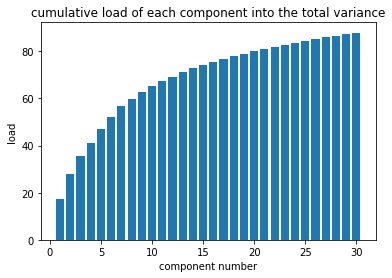

In [63]:
plt.bar(range(1,len(cum_sum) + 1), cum_sum)
plt.title("cumulative load of each component into the total variance")
plt.xlabel("component number")
plt.ylabel("load")

In [64]:
X_df = pd.DataFrame(X, index=labels["cancer"])  # here cancer type is used as an index

In [65]:
X_df.tail(5)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
cancer,,,,,,,,,,,,,,,,,,,,,
ALL,-23618.453158,-6940.030930,-17717.040655,-1517.000778,-7625.491702,22393.041761,-9787.268738,-8012.031976,-6718.302034,-4571.639855,...,13737.519262,-4103.759581,-2787.644070,1639.363023,-13310.966232,4013.250227,4723.559684,5737.632552,-4020.710750,-572.106434
ALL,-37507.863366,-11478.301438,-21542.956898,-8414.967162,-10153.960509,17870.809342,2197.601621,1302.202424,2946.406469,5062.425986,...,5481.690043,10378.138257,3426.838540,2184.072950,-5172.996788,4293.971461,-252.264674,3153.927718,-7190.993278,8683.769424
ALL,30685.427241,-19049.730381,5561.076340,2920.518401,-7108.686145,-9884.360646,3834.857791,-16887.167053,-2928.928548,296.705879,...,4079.069456,-3562.907275,-6155.633541,4471.454427,3363.615632,171.458107,-1037.120621,3614.870806,-8213.413375,-6255.255803
ALL,-8912.556478,-10436.646418,-12169.993761,-9224.308229,-5907.496678,-9105.012295,13998.046435,-2759.088526,3851.675106,14870.488628,...,3504.152717,2112.898529,5276.829155,-4613.398588,6828.014849,-1886.115813,-335.952492,1553.500681,-5541.649450,1531.691460
ALL,2324.557116,-14501.369022,-22130.548339,19.204407,-623.261814,-4715.096140,-2717.879007,-5665.363983,5330.401212,11648.909933,...,7609.602803,-444.574069,4370.299168,-2191.938160,-2752.356009,-579.446517,-5889.619835,-2950.957992,-5537.646096,-4420.691096


In [66]:
X_df["patients"] = range(1,len(labels) + 1)

In [67]:
X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,patients
cancer,,,,,,,,,,,,,,,,,,,,,
ALL,-12371.342652,-16505.720901,-20498.767152,8262.639596,10721.570322,744.187860,7645.088027,-3149.502708,-7896.542733,-9948.169771,...,7636.597044,-4880.093795,824.606231,1668.578528,3484.866881,-7125.284314,-466.749697,-6371.521827,3751.244683,1
ALL,-37565.866073,57.610471,74.305069,21999.097641,-1088.081659,4478.064154,-7902.964932,1945.154078,12138.732446,6392.214127,...,-4536.050880,-12.293393,-7615.265927,-2774.890281,-6923.704576,11070.526731,-844.086433,1273.342776,5794.668720,2
ALL,-19116.366550,-18216.304569,25580.686635,49453.659245,8472.530645,17080.071132,-12063.049270,-7132.630306,14388.178997,-4278.555501,...,-3231.017641,-6341.073461,-4082.608610,-92.983419,9292.510889,-3171.855399,251.794092,6908.784185,1765.024079,3
ALL,-8712.903974,-17386.580697,-1775.273800,7163.923832,6213.389741,-5058.141741,-8023.071305,-2778.359069,-15506.841277,-16828.532043,...,-12145.705491,-5980.575084,-1643.975970,-3155.033534,21.892427,2103.274521,-2404.672113,8384.703077,2627.944561,4
ALL,-29690.895110,-12205.169005,3840.706691,-16135.170304,-3986.636230,11519.331398,3321.379623,-5573.019094,-6739.243779,-4698.211604,...,-3433.409726,-3441.096027,-4876.132132,-3933.071840,4259.753648,10635.171283,-6588.456211,6157.178516,4252.605810,5


finding projection which will give the best view:

Text(0.5,1,'PCA')

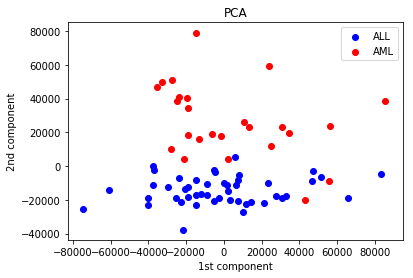

In [68]:
# awkward style of dots labelling, but still it works

plt.scatter(X_df.loc["ALL",0], X_df.loc["ALL",1], c="blue", label="ALL")
plt.scatter(X_df.loc["AML",0], X_df.loc["AML",1], c="red", label="AML")
    
plt.legend()

plt.xlabel("1st component")
plt.ylabel("2nd component")
plt.title("PCA")

Text(0.5,1,'PCA')

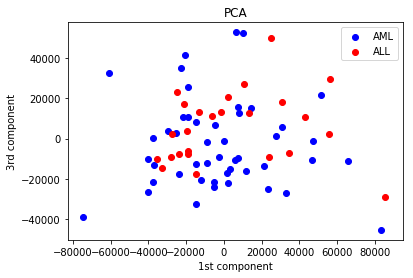

In [42]:
plt.scatter(X_df.loc["ALL",0], X_df.loc["ALL",2], c="blue", label="ALL")
plt.scatter(X_df.loc["AML",0], X_df.loc["AML",2], c="red", label="AML")
    
plt.legend()

plt.xlabel("1st component")
plt.ylabel("3rd component")
plt.title("PCA")

Text(0.5,1,'PCA')

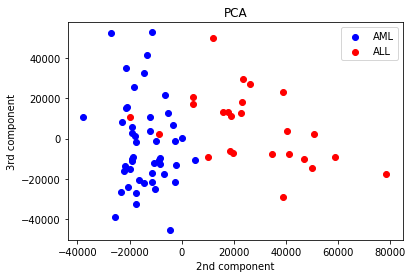

In [43]:
plt.scatter(X_df.loc["ALL",1], X_df.loc["ALL",2], c="blue", label="ALL")
plt.scatter(X_df.loc["AML",1], X_df.loc["AML",2], c="red", label="AML")
    
plt.legend()

plt.xlabel("2nd component")
plt.ylabel("3rd component")
plt.title("PCA")

<IPython.core.display.Javascript object>


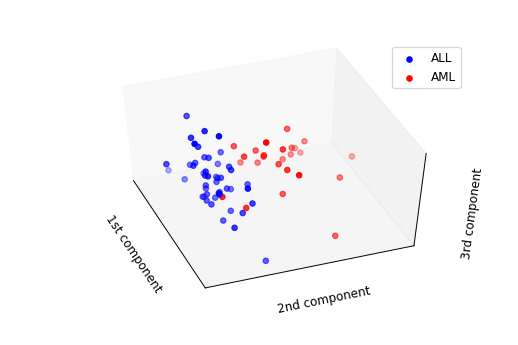

In [47]:
%matplotlib notebook
from mpl_toolkits import mplot3d
fig_3D = plt.figure()
ax = plt.axes(projection="3d")

ax.scatter(X_df.loc["ALL",0], X_df.loc["ALL",1], X_df.loc["ALL",2], c="blue", label="ALL")
ax.scatter(X_df.loc["AML",0], X_df.loc["AML",1], X_df.loc["AML",2], c="red", label="AML")

ax.set_xlabel("1st component")
ax.set_ylabel("2nd component")
ax.set_zlabel("3rd component")
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])


ax.legend()